# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here.
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

x_values=[17,51,27,21,36,48,19,26,54,30]
y_values=[10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

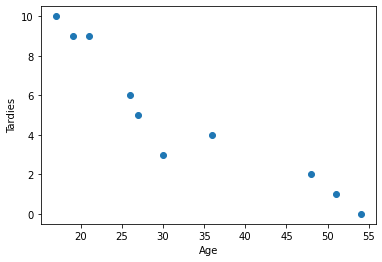

In [6]:
# Your code here.
X = student_data[['X']]# will add more columns in future
y = student_data['Y']# pandas series is a one_dimensional Numpy array,so can only hold one column
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
# Your response here. 
#Yes,more older student,less delay(more punctual) they are ie.younger the students are, the more often they are late to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
#correlation:
display(student_data['X'].corr(student_data['Y']))#Pearson correlation.Result indicate that very strong negative corelation,means one increse,the other decrease.
#covariance:
X1=student_data['X'].to_numpy()

Y1=student_data['Y'].to_numpy()

np.cov(X1,Y1)# negative covariance,here if age increse,then tardiness decres

-0.9391626886887122

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
X = student_data[['X']]# Age is my independent variable
y = student_data['Y']#Tardies is my outcome variable

model = linear_model.LinearRegression()#Tardies is my outcome variable.Using LinearRegression
result = model.fit(X,y)

#result = linear_model.LinearRegression().fit(X,y)

Plot your regression model on your scatter plot.

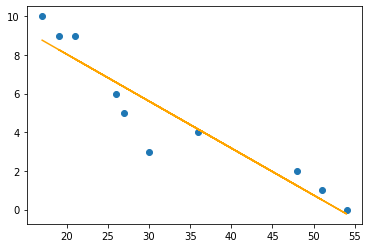

In [11]:
# Your code here.
regression_line = result.intercept_+result.coef_[0]*X 
plt.plot(X, regression_line, c = 'orange')
plt.scatter(X,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Your response here. 
result.score(X,y)  #the R^2 value gives us a notion of how good is our fit.

#0.88 accuary indicate that our model is pretty good(since % of error captured by linear estimate is closer to 1) and our prediction is good also.

0.8820265558250109

In [8]:
print(model.intercept_, model.coef_, model.score(X, y))

12.888803363135768 [-0.24282077] 0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
vehicles=pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here. 
vehicles_df=vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_df

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [11]:
vehicles_df.duplicated()# check duplicate records(rows) in a DataFrame based on all

0        False
1        False
2        False
3        False
4        False
         ...  
35947     True
35948     True
35949     True
35950    False
35951    False
Length: 35952, dtype: bool

In [12]:
vehicles_df.dtypes

Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
Fuel Cost/Year               int64
CO2 Emission Grams/Mile    float64
dtype: object

In [13]:
vehicles_df.drop_duplicates()#it removes duplicate rows based on all columns.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35939,2017,3.0,9.694412,34,1200,258.000000
35940,2008,3.0,9.155833,36,1100,246.861111
35941,2009,3.0,9.155833,36,1100,246.861111
35950,2016,3.0,9.155833,36,1100,246.000000


In [14]:
vehicles_df.shape

(35952, 6)

In [15]:
vehicles_df.isna().sum()  # checking NaN, our data has no NaN values.

Year                       0
Cylinders                  0
Fuel Barrels/Year          0
Combined MPG               0
Fuel Cost/Year             0
CO2 Emission Grams/Mile    0
dtype: int64

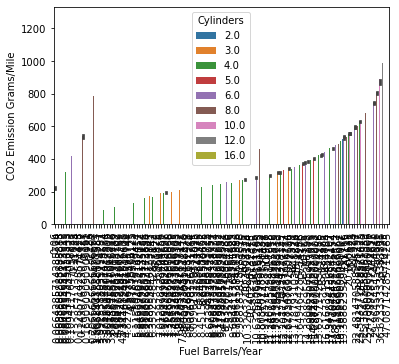

In [18]:
#ax = sns.barplot(x="Fuel Barrels/Year", y="CO2 Emission Grams/Mile", hue="Cylinders", data=vehicles_df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.show()

In [211]:
#Selecting variables
vehicles_df.corr()[['CO2 Emission Grams/Mile']].sort_values(by='CO2 Emission Grams/Mile',ascending=False).head(10)# help us to select the variables which are highly correleted with 'CO2 Emission Grams/Mile'(our target variable)

,CO2 Emission Grams/Mile
CO2 Emission Grams/Mile,1.000000
Fuel Barrels/Year,0.986189
Fuel Cost/Year,0.930865
Cylinders,0.752393
Year,-0.222300
Combined MPG,-0.926229


In [212]:
vehicles_df.describe()#Cylinders is less informative(since lowest Std).we can drop it,but we see it has (0.75) strong correlation with co2 emmission.
#(That's because you were looking at Cylinders as an numerical column while it actually is a Categorical column, as type of motor has an equivalent type of cylinder)
#no variance(1.755268) -> low information

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,5.765076,17.609056,19.929322,1892.598465,475.316339
std,10.08529,1.755268,4.467283,5.112409,506.958627,119.060773
min,1984.00000,2.000000,0.060000,7.000000,600.000000,37.000000
25%,1991.00000,4.000000,14.699423,16.000000,1500.000000,395.000000
50%,2001.00000,6.000000,17.347895,19.000000,1850.000000,467.736842
75%,2010.00000,6.000000,20.600625,23.000000,2200.000000,555.437500
max,2017.00000,16.000000,47.087143,56.000000,5800.000000,1269.571429


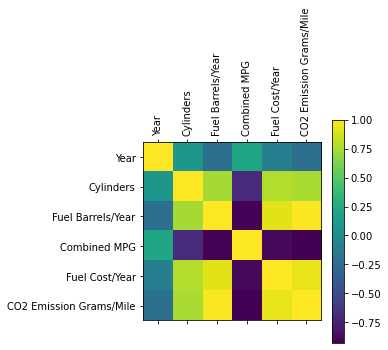

In [213]:
#vehicles_df.corr()
plt.matshow(vehicles_df.corr()) #using matplotlib
plt.xticks(range(6),vehicles_df.corr().columns,rotation=90)
plt.yticks(range(6),vehicles_df.corr().columns)
plt.colorbar()
plt.show()

<AxesSubplot:>

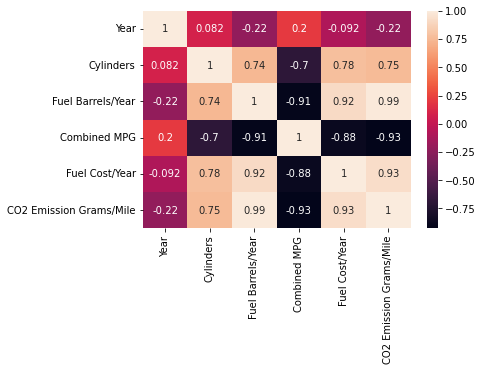

In [214]:
#using seaborn library
sns.heatmap(vehicles_df.corr(), annot=True)# help us to select variables . We keep those variables in X---> those who are less corelated among themself and highly correlated with y(target)

In [215]:
vehicles_df.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year', 'CO2 Emission Grams/Mile'],
      dtype='object')

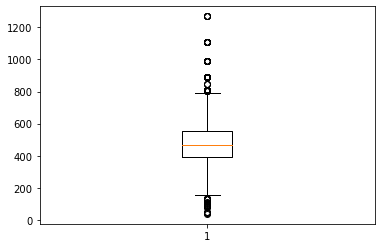

In [216]:
plt.boxplot(vehicles_df['CO2 Emission Grams/Mile'])
plt.show()                   # showing outliers of target variables plt.show()

plt.boxplot(vehicles_df['CO2 Emission Grams/Mile']) # showing outliers of target variables
plt.show()

In [217]:
# I think,Fuel Barrels/Year variable  will be the most important in determining CO2 emissions.
#Combined MPG has least amount of helpful information for determining CO2 emissions

# 'Fuel Barrels/Year' & 'Fuel Cost/Year'-----------highly correlated(0.92)
#'Fuel Barrels/Year' & 'Cylinders'----------correlation(0.74)

In [218]:
#vehicles_df = vehicles_df.drop(columns='Cylinders') #no variance(1.755268) -> low information


In [219]:
vehicles_df.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [220]:
vehicles_df.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year', 'CO2 Emission Grams/Mile'],
      dtype='object')

In [221]:
#Build a regression model for this data:
X = vehicles_df[['Fuel Barrels/Year']]# will add more columns in future
y = vehicles_df['CO2 Emission Grams/Mile']
model = linear_model.LinearRegression()#'CO2 Emission Grams/Mile' is my outcome variable.Using LinearRegression
result = model.fit(X,y)

In [222]:
#define predictor and response variables
#X, y = df[['x1', 'x2']], df.y

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [223]:
# Your response here. 
#interpret the results:the accuracy of model is amazing
result.score(X,y)

0.9725680773391494

In [224]:
#Print your regression summary:
#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(X, y))


12.486520830758423 [26.2836254] 0.9725680773391494


In [225]:
#Multi-regression(Linear)
X = vehicles_df[['Fuel Barrels/Year','Cylinders']]
y = vehicles_df['CO2 Emission Grams/Mile']
model = linear_model.LinearRegression()#'CO2 Emission Grams/Mile' is my outcome variable.Using LinearRegression
result = model.fit(X,y)
result.score(X,y)

0.9737445898885942

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [226]:
# Your code here.
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
x_values=[1,3,4,6,8,9,11,14]
y_values=[1,2,4,4,5,7,8,13]
party_df = pd.DataFrame({'X': x_values, 'Y': y_values})
party_df



,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

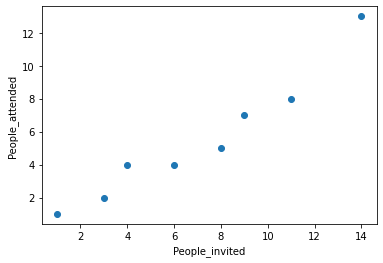

In [227]:
# Your code here.
X = party_df[['X']]# will add more columns in future
y = party_df['Y']# pandas series is a one_dimensional Numpy array,so can only hold one column
plt.scatter(X,y)
plt.xlabel('People_invited')
plt.ylabel('People_attended')
plt.show()



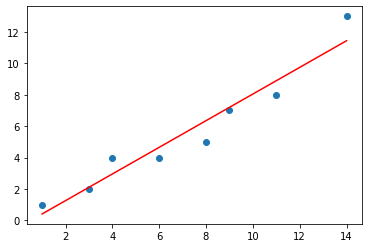

In [228]:
model = linear_model.LinearRegression()
result = model.fit(X,y)
regression_line = result.intercept_+result.coef_[0]*X 
plt.plot(X, regression_line, c = 'red')
plt.scatter(X,y)
plt.show()

In [229]:
model.score(X, y)

0.9316696375519905

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [230]:
# Your respose here. 
#Print the results from your regression.
#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(X, y))  

-0.43939393939393945 [0.84848485] 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

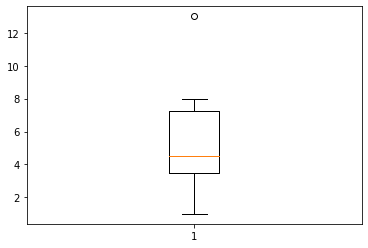

In [231]:
# Your response here. 
plt.boxplot(party_df['Y'])  # outliers in Y
plt.show() 

In [235]:
#Handling the outliers
q3, q1 = np.percentile(party_df['Y'], [75 ,25])
iqr = q3 - q1
party_df=party_df[party_df['Y']<q3+(iqr*1.5)]

In [236]:
party_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


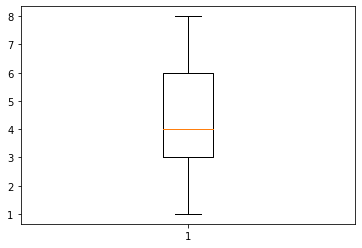

In [237]:
plt.boxplot(party_df['Y'])
plt.show() 

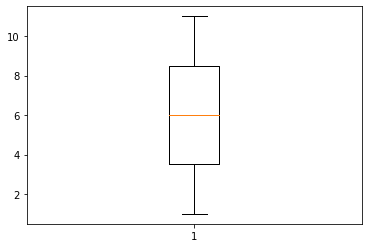

In [238]:
plt.boxplot(party_df['X']) # no outliers in X
plt.show() 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

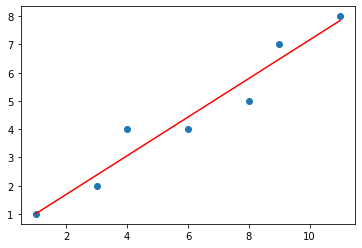

0.9433811802232854

In [240]:
# Your response here. 
X = party_df[['X']]
y = party_df['Y']
model1 = linear_model.LinearRegression()
result = model1.fit(X,y)
regression_line = result.intercept_+result.coef_[0]*X 
plt.plot(X, regression_line, c = 'red')
plt.scatter(X,y)
plt.show()
model1.score(X, y)

In [241]:
#the data with the problematic point at(14,13),y=13
# score increases:(0.9316696375519905) to 0.9433811802232854